# <font color="gray">Problem Statement :
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

### Import basic libraries

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Load dataset

In [293]:
data=pd.read_excel("flight-fareData\Flight_Fare.xlsx")

In [294]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

* Price is target 

*   "Airline" "Date_of_Journey" "Source" "Destination" "Route" "Dep_Time" "Arrival_Time" "Duration" "Total_Stops" and "Additional_Info" : are input variables

* These variables collectively provide information about flights, their schedules, routes, and various details that passengers or booking systems might need when making travel arrangements or reservations.


### Basic Checks

In [295]:
# shape
data.shape

(10683, 11)

* <b><font color="green">Size of the Dataset: </b>

The dataset contains 10683 data records, which is a moderately large dataset. This can provide a substantial amount of information for analysis.

In [296]:
# print all columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [297]:
# dtypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* The data consists of 10 categorical columns and 1 numerical column.


In [298]:
# head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [299]:
# tail
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [300]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [301]:
# describe ( for numerical values)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


### Insights

* <b><font color="green">Mean Price:</b> 

The average price of the flights in the dataset is approximately 9087. This represents the central tendency of the prices. It can serve as a reference point to understand the typical cost of flights in the dataset.

* <b><font color="green">Standard Deviation: </b>

The standard deviation of approximately 4611 indicates the spread or dispersion of prices around the mean. A higher standard deviation suggests that the prices in the dataset vary widely from the average. In this case, the relatively high standard deviation suggests that flight prices have a significant degree of variability.

* <b><font color="green">Minimum Price: </b>

The lowest recorded price in the dataset is 1759. This information indicates that there are relatively affordable flight options available in the dataset.

* <b><font color="green">Maximum flight price : </b>

The maximum flight price of 79512 indicates that there are some relatively expensive flight options included in the data, possibly for premium or long-distance flights or special classes.

In [302]:
# describe ( for catégorical values)
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### Insights

* <b><font color="green">Airline Distribution:</b>

<b>Jet Airways </b> is the most common airline, accounting for approximately <b>36%</b> of the dataset.
The remaining airlines make up the remaining 64% of the dataset.

* <b><font color="green">Source Distribution:</b>

Flights departing from <b>Delhi</b> make up about <b>42.5%</b> of the dataset.
The other source locations account for the remaining 57.5%.

* <b><font color="green">Destination Distribution:</b>

Flights heading to <b>Cochin</b> make up approximately <b>42.5%</b> of the dataset.
The other destination locations account for the remaining 57.5%.

* <b><font color="green">Route Distribution:</b>

The route <b>"DEL → BOM → COK"</b> is the most common and represents about <b>22.2%</b> of the dataset.
The other routes are less frequent.

* <b><font color="green">Duration Distribution:</b>

The duration <b>"2h 50m"</b> is the most common, representing approximately <b>52.6%</b> of the dataset.
Other durations are less frequent.

* <b><font color="green">Total Stops Distribution:</b>

Flights with <b>"1 stop"</b> account for the majority, making up around <b>52.7%</b> of the dataset.
Flights with other stop counts are less common.

* <b><font color="green">Additional Info Distribution:</b>

This column is dominated by the <b>"No info"</b> value, which accounts for approximately <b>80%</b> of the data. Consequently, it is advisable to remove or exclude this column from the dataset.

* The columns related to <b>'Departure Time Distribution'</b> <b>'Date of Journey Distribution'</b> and <b>'Arrival Time Distribution'</b> appear to contain less significant information at this stage. We will reevaluate their importance and relevance after performing data preprocessing and analysis.

In [303]:
# Check for missing values
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [304]:
# check percentage of missing values
data.isnull().sum()/len(data)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

* Only Two rows with missing values from 10683. This two rows can be considered for removal in subsequent data cleaning processes. 

## Exploratory Data Analysis

### univariate analysis
* Analysing single variables
* check the distribution of each column

In [305]:
df = pd.DataFrame(data)

In [306]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


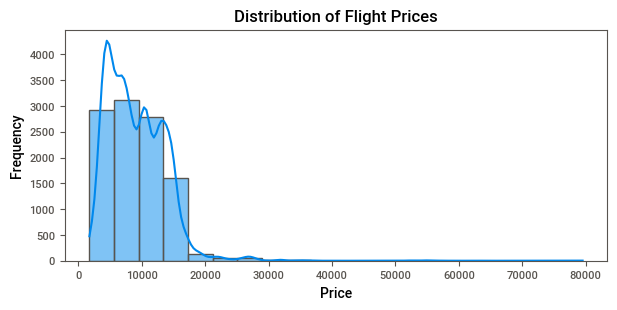

In [307]:
# Check distribution of Price
# Plot the distribution of prices using a histogram
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
# Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

### Insights 

<b>The price data exhibits skewness and does not follow a normal distribution.</b>

In [308]:
## Univariate Analysis
!pip install sweetviz  


In [309]:
import sweetviz as sv#importing sweetviz library 
my_report1 = sv.analyze(data)#syntax to use sweetviz
my_report1.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Exploration :

### Bivariate analysis 

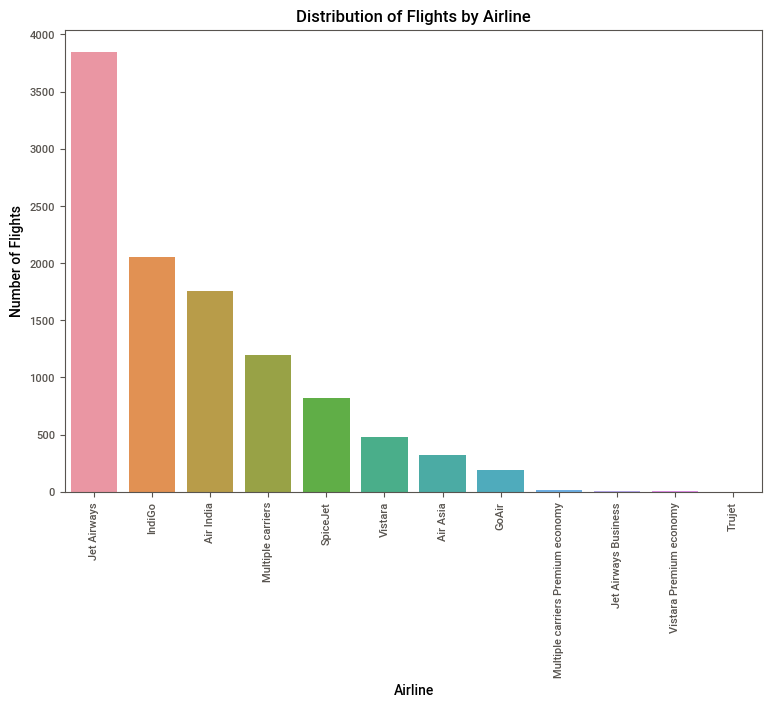

In [310]:
# Plot the distribution of flights by airline
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.show()

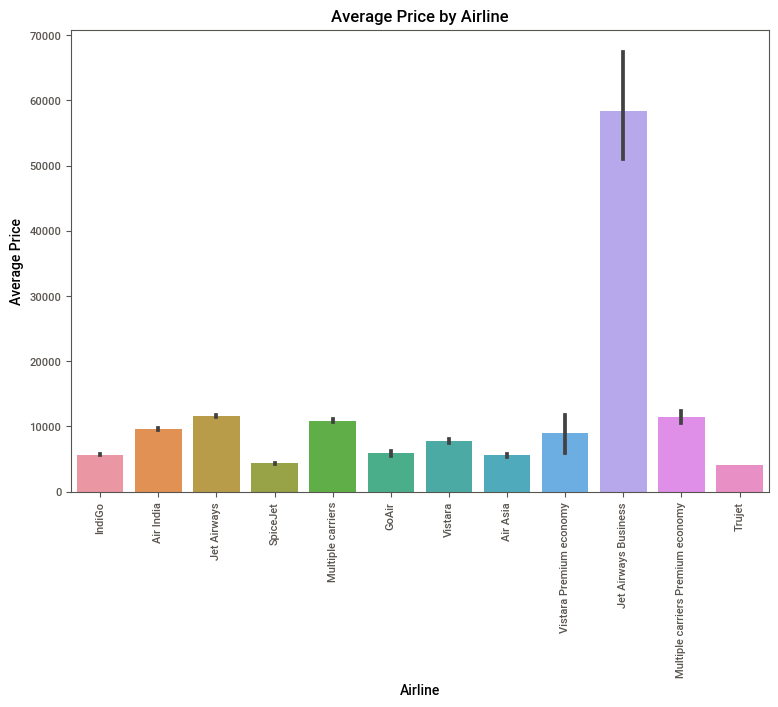

In [311]:
# Plot the distribution of Price by Airline
plt.figure(figsize=(9, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

### Insights

* <b><font color="green">Jet Airways Business have the hignest average of price and the hignest number of flights </b>

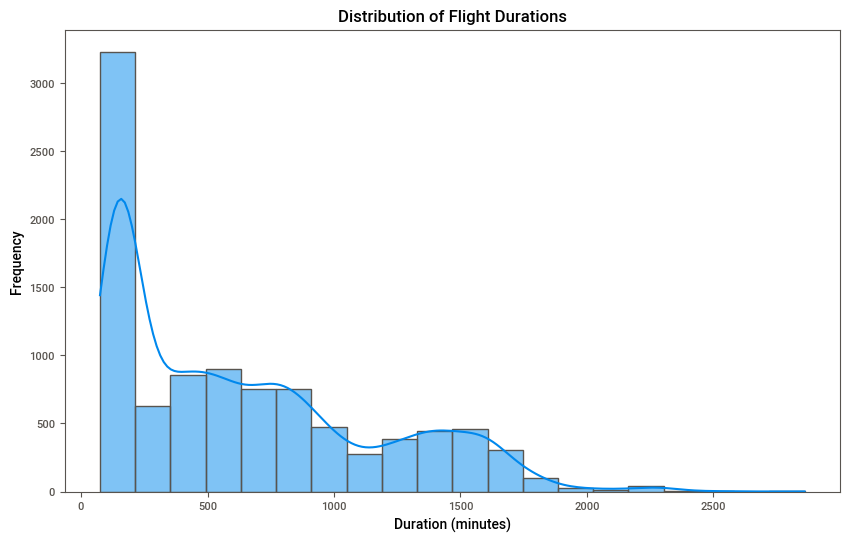

In [312]:
# Extract hours and minutes from the 'Duration' column
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)

# Calculate total duration in minutes
df['Total_Duration_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']

# Plot the distribution of flight durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Total_Duration_minutes', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

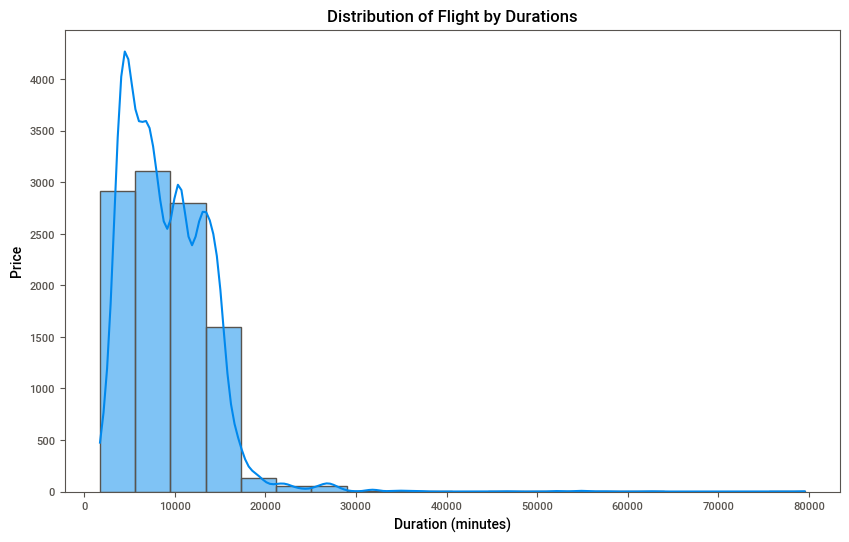

In [313]:
# Plot the distribution of price durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Distribution of Flight by Durations')
plt.show()


In [314]:
# Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix['Price'])

Price                     1.000000
Duration_hours            0.508985
Duration_minutes         -0.115713
Total_Duration_minutes    0.512132
Name: Price, dtype: float64


In [315]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Total_Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.0,50.0,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.0,25.0,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.0,NaN,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.0,25.0,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.0,45.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2.0,30.0,150.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2.0,35.0,155.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,3.0,NaN,NaN
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2.0,40.0,160.0


In [316]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_hours', 'Duration_minutes',
       'Total_Duration_minutes'],
      dtype='object')


In [317]:
data.drop("Duration_hours", axis = 1, inplace = True)


In [318]:
data.drop("Duration_minutes", axis = 1, inplace = True)


In [319]:
data.drop("Total_Duration_minutes", axis = 1, inplace = True)


In [320]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


# Data Preprocessing

In [161]:
# number of rows with missing values is relatively small compared to your dataset's size
#and removing them doesn't significantly impact the quality of your data==> i will drop these rows.

In [321]:
data.dropna(subset=['Route'], inplace=True)


In [322]:
data.dropna(subset=['Total_Stops'], inplace=True)


In [323]:
# Re check for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Check for duplicates and handling them

In [324]:
# check for duplicate values
data.duplicated().sum()

220

In [325]:
#Remove Duplicate Rows
data.drop_duplicates(inplace=True)

In [326]:
# Re check for duplicate values
data.duplicated().sum()


0

In [327]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Check for outliers

<Axes: xlabel='Price'>

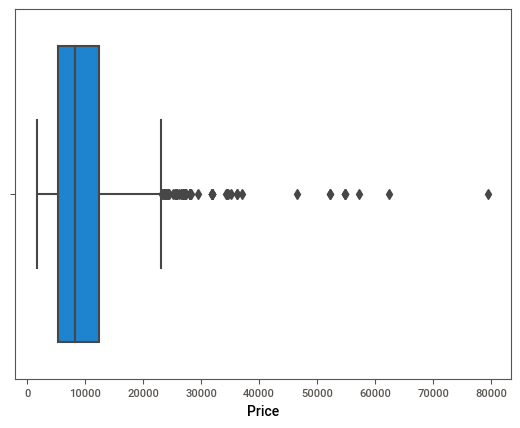

In [328]:
# check outliers in price
sns.boxplot(x=data.Price)

* <I> We can see many outliers in Price column.</I> 
* <I> outliers in Price are seen toward right side.</I> 

* To handle those outliers
* IQR- Use this method when data is not normal
* 3-sigma rule - use this method when data is normal

<b><font color="green">Steps:</font></b>
* find Q1 and Q3
* fid IQR=Q3-Q1
* find lower limit and upper limit
* lower_limit=Q1-1.5*IQR
* upper_limit=Q3+1.5*IQR
* Find records/values which are greater than upper limit and less than lower limit



In [329]:
# find Q1 and Q3
Q1=data['Price'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Price'].quantile(0.75)
print("upper quartile",Q3)


lower quartile 5224.0
upper quartile 12344.75


In [330]:
# find IQR
IQR=Q3-Q1
IQR

7120.75

In [331]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -5457.125
upper_limit is 23025.875


In [332]:
# find values above upper_limit
data.loc[data['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [333]:
len(data.loc[data['Price']>upper_limit])/len(data)

0.008984897725100364

In [334]:
# find values below lower limit
data.loc[data['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [335]:
# How to handle outliers
# since data is not normal will replace outliers with median
data.loc[data['Price']>upper_limit,"Price"]=data["Price"].median()

<Axes: xlabel='Price'>

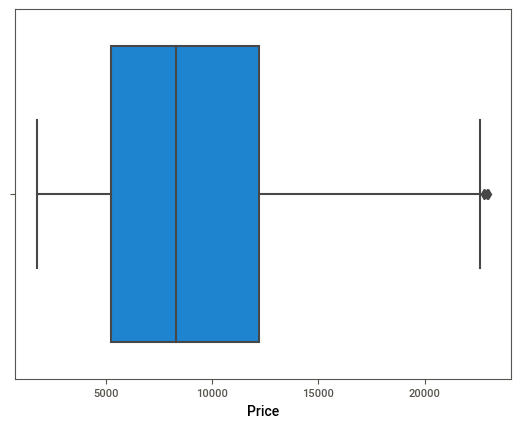

In [336]:
# check are there any outliers in Price
sns.boxplot(x=data.Price)

# Data Processing

In [337]:
print(data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [338]:
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
# 'Airline', 'Source', 'Destination', 'Total_Stops'
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

    
    
# 'Duration'
# Convert Duration to total minutes
data['Duration_hours'] = data['Duration'].str.extract(r'(\d+)h').astype(float).fillna(0)
data['Duration_minutes'] = data['Duration'].str.extract(r'(\d+)m').astype(float).fillna(0)
data['Duration_total_minutes'] = data['Duration_hours'] * 60 + data['Duration_minutes']

# 'Date_of_Journey'
# Parse Date_of_Journey column and extract features (day, month, year)
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

# 'Dep_Time'
# Extract hours and minutes from Dep_Time
data['Dep_Hours'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[0].astype(int)
data['Dep_Minutes'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Convert Dep_Time to minutes
data['Dep_Minutes_Since_Midnight'] = data['Dep_Hours'] * 60 + data['Dep_Minutes']


# 'Arrival_Time'
# Extract time of arrival (if available)
data['Arrival_Time'] = data['Arrival_Time'].str.extract(r'(\d+:\d+)')
# Extract day and month (if available)
data['Arrival_Day'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[0]
data['Arrival_Month'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[1]


In [339]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight,Arrival_Day,Arrival_Month
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10,2h 50m,4,No info,...,50.0,170.0,24,3,2019,22,20,1340,NaN,NaN
1,1,2019-05-01,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,...,25.0,445.0,1,5,2019,5,50,350,NaN,NaN
2,4,2019-06-09,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,1,No info,...,0.0,1140.0,9,6,2019,9,25,565,NaN,NaN
3,3,2019-05-12,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,No info,...,25.0,325.0,12,5,2019,18,5,1085,NaN,NaN
4,3,2019-03-01,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,No info,...,45.0,285.0,1,3,2019,16,50,1010,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,3,0,CCU → BLR,19:55,22:25,2h 30m,4,No info,...,30.0,150.0,9,4,2019,19,55,1195,NaN,NaN
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,2h 35m,4,No info,...,35.0,155.0,27,4,2019,20,45,1245,NaN,NaN
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,3h,4,No info,...,0.0,180.0,27,4,2019,8,20,500,NaN,NaN
10681,10,2019-03-01,0,5,BLR → DEL,11:30,14:10,2h 40m,4,No info,...,40.0,160.0,1,3,2019,11,30,690,NaN,NaN


In [340]:
data.isnull().sum()

Airline                           0
Date_of_Journey                   0
Source                            0
Destination                       0
Route                             0
Dep_Time                          0
Arrival_Time                      0
Duration                          0
Total_Stops                       0
Additional_Info                   0
Price                             0
Duration_hours                    0
Duration_minutes                  0
Duration_total_minutes            0
Journey_day                       0
Journey_month                     0
Journey_year                      0
Dep_Hours                         0
Dep_Minutes                       0
Dep_Minutes_Since_Midnight        0
Arrival_Day                   10462
Arrival_Month                 10462
dtype: int64

In [341]:
# drope 2 colums with no value because we find this info on date time
data.drop(columns=['Arrival_Day', 'Arrival_Month'], inplace=True)


In [342]:
data.drop(columns=['Date_of_Journey', 'Arrival_Time', 'Dep_Time'], inplace=True)


In [343]:
# all data is in 2019
data.drop(columns=['Journey_year'], inplace=True)


In [344]:
data.drop(columns=['Additional_Info'], inplace=True)

In [345]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,0,5,BLR → DEL,2h 50m,4,3897,2.0,50.0,170.0,24,3,22,20,1340
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,1,7662,7.0,25.0,445.0,1,5,5,50,350
2,4,2,1,DEL → LKO → BOM → COK,19h,1,13882,19.0,0.0,1140.0,9,6,9,25,565
3,3,3,0,CCU → NAG → BLR,5h 25m,0,6218,5.0,25.0,325.0,12,5,18,5,1085
4,3,0,5,BLR → NAG → DEL,4h 45m,0,13302,4.0,45.0,285.0,1,3,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,2h 30m,4,4107,2.0,30.0,150.0,9,4,19,55,1195
10679,1,3,0,CCU → BLR,2h 35m,4,4145,2.0,35.0,155.0,27,4,20,45,1245
10680,4,0,2,BLR → DEL,3h,4,7229,3.0,0.0,180.0,27,4,8,20,500
10681,10,0,5,BLR → DEL,2h 40m,4,12648,2.0,40.0,160.0,1,3,11,30,690


In [346]:
data.drop(columns=['Route'], inplace=True)


In [347]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,0,5,2h 50m,4,3897,2.0,50.0,170.0,24,3,22,20,1340
1,1,3,0,7h 25m,1,7662,7.0,25.0,445.0,1,5,5,50,350
2,4,2,1,19h,1,13882,19.0,0.0,1140.0,9,6,9,25,565
3,3,3,0,5h 25m,0,6218,5.0,25.0,325.0,12,5,18,5,1085
4,3,0,5,4h 45m,0,13302,4.0,45.0,285.0,1,3,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2h 30m,4,4107,2.0,30.0,150.0,9,4,19,55,1195
10679,1,3,0,2h 35m,4,4145,2.0,35.0,155.0,27,4,20,45,1245
10680,4,0,2,3h,4,7229,3.0,0.0,180.0,27,4,8,20,500
10681,10,0,5,2h 40m,4,12648,2.0,40.0,160.0,1,3,11,30,690


In [348]:
data.drop(columns=['Duration'], inplace=True)


In [349]:
data

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,0,5,4,3897,2.0,50.0,170.0,24,3,22,20,1340
1,1,3,0,1,7662,7.0,25.0,445.0,1,5,5,50,350
2,4,2,1,1,13882,19.0,0.0,1140.0,9,6,9,25,565
3,3,3,0,0,6218,5.0,25.0,325.0,12,5,18,5,1085
4,3,0,5,0,13302,4.0,45.0,285.0,1,3,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,2.0,30.0,150.0,9,4,19,55,1195
10679,1,3,0,4,4145,2.0,35.0,155.0,27,4,20,45,1245
10680,4,0,2,4,7229,3.0,0.0,180.0,27,4,8,20,500
10681,10,0,5,4,12648,2.0,40.0,160.0,1,3,11,30,690


# Feature Engineering

### <font color="green">Droping irrelevant columns and Selecting best features

* Drop the columns which has very less correlation with target variables.
* Drop one of the column if two input variables has high correlation

In [351]:
data.corr()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
Airline,1.000000,-0.012172,0.015942,0.034396,-0.041462,-0.151962,-0.031290,-0.153618,0.026482,0.026083,-0.032267,-0.062421,-0.035661
Source,-0.012172,1.000000,-0.589992,-0.222859,0.074518,0.167051,-0.145475,0.162808,0.005440,0.181072,0.060218,-0.056609,0.057080
Destination,0.015942,-0.589992,1.000000,0.334097,-0.165823,-0.255273,0.060532,-0.254243,-0.040994,-0.362186,-0.074056,0.128523,-0.066974
Total_Stops,0.034396,-0.222859,0.334097,1.000000,-0.620950,-0.613582,0.184455,-0.609794,0.030271,-0.021409,0.040310,0.049338,0.042982
Price,-0.041462,0.074518,-0.165823,-0.620950,1.000000,0.567567,-0.147018,0.564858,-0.121246,-0.058655,0.004967,-0.053522,0.002035
Duration_hours,-0.151962,0.167051,-0.255273,-0.613582,0.567567,1.000000,-0.133999,0.999442,-0.029382,0.006410,-0.000648,-0.022147,-0.001859
Duration_minutes,-0.031290,-0.145475,0.060532,0.184455,-0.147018,-0.133999,1.000000,-0.100819,-0.009244,-0.046325,-0.018843,0.089269,-0.013945
Duration_total_minutes,-0.153618,0.162808,-0.254243,-0.609794,0.564858,0.999442,-0.100819,1.000000,-0.029810,0.004874,-0.001285,-0.019225,-0.002337
Journey_day,0.026482,0.005440,-0.040994,0.030271,-0.121246,-0.029382,-0.009244,-0.029810,1.000000,-0.038331,-0.003394,-0.004741,-0.003651
Journey_month,0.026083,0.181072,-0.362186,-0.021409,-0.058655,0.006410,-0.046325,0.004874,-0.038331,1.000000,0.040406,-0.062636,0.036951


<Axes: >

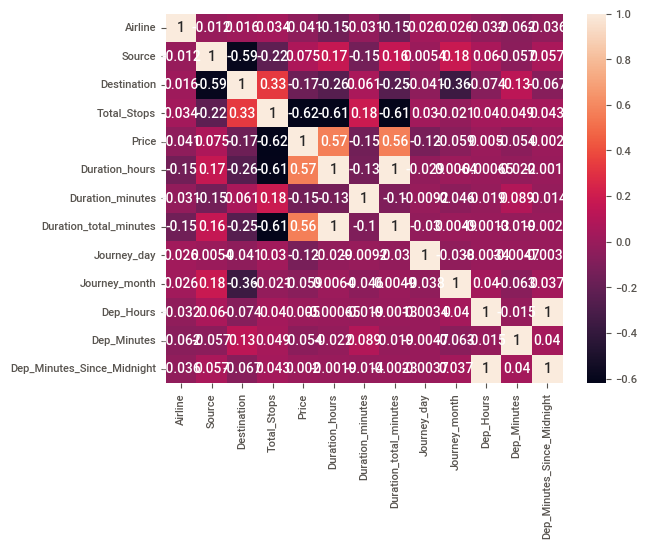

In [354]:
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values


<Axes: >

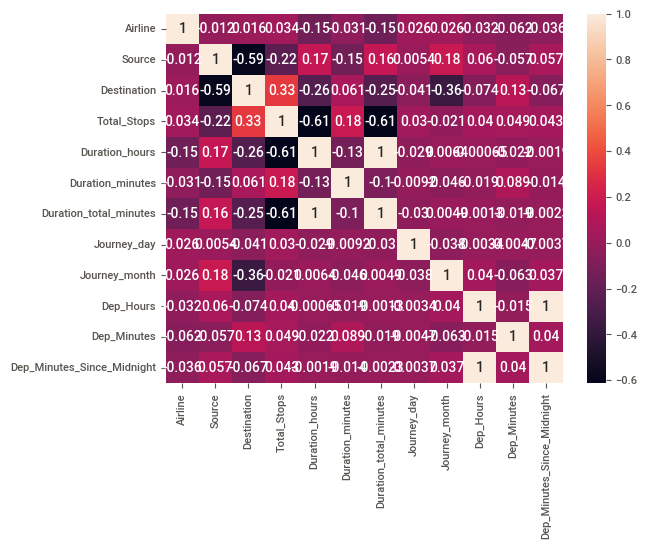

In [355]:
# check for multicollinearity- there shoud not be any high correlation among input variables
sns.heatmap(data.drop("Price",axis=1).corr(),annot=True)

### Split data into x and y

In [223]:
x=data.drop("Price",axis=1)
y=data['Price']

### Split data for training and testing

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feature engineering

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [225]:
X_train.shape

(7323, 12)

In [226]:
X_test.shape

(3139, 12)

In [227]:
y_train.shape

(7323,)

In [228]:
y_test.shape

(3139,)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airline                     10462 non-null  int32  
 1   Source                      10462 non-null  int32  
 2   Destination                 10462 non-null  int32  
 3   Total_Stops                 10462 non-null  int32  
 4   Price                       10462 non-null  int64  
 5   Duration_hours              10462 non-null  float64
 6   Duration_minutes            10462 non-null  float64
 7   Duration_total_minutes      10462 non-null  float64
 8   Journey_day                 10462 non-null  int64  
 9   Journey_month               10462 non-null  int64  
 10  Dep_Hours                   10462 non-null  int32  
 11  Dep_Minutes                 10462 non-null  int32  
 12  Dep_Minutes_Since_Midnight  10462 non-null  int32  
dtypes: float64(3), int32(7), int64(

In [230]:
data.drop(columns=[Duration_hours], inplace=True)


NameError: name 'Duration_hours' is not defined

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airline                     10462 non-null  int32  
 1   Source                      10462 non-null  int32  
 2   Destination                 10462 non-null  int32  
 3   Total_Stops                 10462 non-null  int32  
 4   Price                       10462 non-null  int64  
 5   Duration_hours              10462 non-null  float64
 6   Duration_minutes            10462 non-null  float64
 7   Duration_total_minutes      10462 non-null  float64
 8   Journey_day                 10462 non-null  int64  
 9   Journey_month               10462 non-null  int64  
 10  Dep_Hours                   10462 non-null  int32  
 11  Dep_Minutes                 10462 non-null  int32  
 12  Dep_Minutes_Since_Midnight  10462 non-null  int32  
dtypes: float64(3), int32(7), int64(

# Model Building LinearRegression

In [232]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(X_train,y_train)

LinearRegression()

In [233]:
# make predictions /test model
y_pred=model.predict(X_test)
y_pred

array([ 5365.6726015 ,  5700.0057699 ,  4859.80323656, ...,
       11020.4005949 , 13072.51777012, 10138.16104971])

In [234]:
y_test

6572     5747
9438     6094
1680     4384
8653    11467
6999     4030
        ...  
4702    12080
3582     2017
5589    14714
8052    10539
2558     8099
Name: Price, Length: 3139, dtype: int64

In [235]:
# slopes/coefficients of x
model.coef_

array([ 3.98788088e+01, -2.46307848e+02, -4.36360793e+01, -9.93047520e+02,
        2.20594828e-01, -1.08322214e+01,  2.40346829e+00, -4.98102897e+01,
       -2.26580581e+02,  1.38991457e-01, -7.97978458e+00,  3.59702825e-01])

In [236]:
# intercept
model.intercept_

11088.582815563192

# Evaluate the model

In [238]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [239]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

8743531.749734342

In [240]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE


2313.4018939034095

In [241]:
# RMSE
rmse=np.sqrt(MSE)
rmse

2956.9463555726443

In [242]:
# r2_score
r2_score(y_test,y_pred)

0.4588010237399728

In [243]:
# 0.47 BAD model

In [244]:
# adjusted R2 score

In [245]:
data.shape

(10462, 13)

In [246]:
adj_r2=1-(1-0.47538303874580135)*(10462-1)/(10462-15-1)
adj_r2

0.47462971169058277

# trying RandomForestRegressor

In [247]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [248]:
y_pred = reg_rf.predict(X_test)

In [249]:
reg_rf.score(X_train, y_train)

0.9487995349176014

In [250]:
reg_rf.score(X_test, y_test)

0.7949051463077261

In [251]:
# r2_score
r2_score(y_test,y_pred)

0.7949051463077261

# GradientBoostingRegressor

In [252]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the feature importances
feature_importances = gb_regressor.feature_importances_
# Assign feature_importances to your feature columns for interpretation






Mean Absolute Error (MAE): 1509.8141304857782
Mean Squared Error (MSE): 4146651.4505475406
Root Mean Squared Error (RMSE): 2036.3328437530886
R-squared (R2) Score: 0.7433344346222943


# SVR

In [253]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 3184.842777929387
Mean Squared Error (MSE): 15232612.391272057
Root Mean Squared Error (RMSE): 3902.897947842354
R-squared (R2) Score: 0.05714596024967622


# neural network model for regression

In [254]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [255]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Epoch 1/50
229/229 [==============================] - 2s 3ms/step - loss: 90295928.0000
Epoch 2/50
229/229 [==============================] - 1s 3ms/step - loss: 51326024.0000
Epoch 3/50
229/229 [==============================] - 1s 3ms/step - loss: 18234788.0000
Epoch 4/50
229/229 [==============================] - 1s 3ms/step - loss: 11843911.0000
Epoch 5/50
229/229 [==============================] - 1s 3ms/step - loss: 10758425.0000
Epoch 6/50
229/229 [==============================] - 1s 3ms/step - loss: 10337246.0000
Epoch 7/50
229/229 [==============================] - 1s 3ms/step - loss: 10050065.0000
Epoch 8/50
229/229 [==============================] - 1s 3ms/step - loss: 9815477.0000
Epoch 9/50
229/229 [==============================] - 1s 3ms/step - loss: 9618347.0000
Epoch 10/50
229/229 [==============================] - 1s 3ms/step - loss: 9447136.0000
Epoch 11/50
229/229 [==============================] - 1s 3ms/step - loss: 9292204.0000
Epoch 12/50
229/229 [=============

# Lasso regression , Ridge regression

In [256]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Standardize the features (important for Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set for Lasso
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set for Ridge
y_pred_ridge = ridge_regressor.predict(X_test_scaled)

# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Absolute Error (MAE):", mae_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2) Score:", r2_lasso)

print("\nRidge Regression:")
print("Mean Absolute Error (MAE):", mae_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2) Score:", r2_ridge)

Lasso Regression:
Mean Absolute Error (MAE): 2313.3803767737545
Mean Squared Error (MSE): 8743016.8006555
Root Mean Squared Error (RMSE): 2956.8592798196364
R-squared (R2) Score: 0.458832897577945

Ridge Regression:
Mean Absolute Error (MAE): 2313.405297604044
Mean Squared Error (MSE): 8743506.284119878
Root Mean Squared Error (RMSE): 2956.942049503148
R-squared (R2) Score: 0.45880259998683426
